<img src="Title.png">

# Contents
<ol>
<li> Project Introduction </li>
<li> Feature Engineering </li>
<li> Data Exploratory Data Analysis </li>
<li> Data Modelling and Validation </li>
<li> Conclusion </li>
</ol>    

<style>
    body {
        font-size: 9px;
    }
</style>
    
## 1. Introduction
<font color=white size=4 face=Calibri> Titanic was a Britich passenger liner operated by  the White star Line. It striked an iceberg during her maiden voyage from Southampton to New York City and killed 1502 out of 2224 passengers and crew. Yet it left a most romantic story in 20th Century. </font>
<br>
<br>
<font color=white size=4 face=Calibri> <mark style = background-color:#AFEEEE><font color=black size=4 face=Calibri>**Titanic - Machine Learning from Disaster**</font></mark> is a beginner level ML competition on Kaggle. The goal of the competition is to predict the survival or the death of a given passenger based on certain variables. This project heavily focuses on Exploratory Data Analysis and Feature Engineering. A lot of people has done quite a lot of research on this dataset, yet we still decided to work on the titanic dataset to  explore our way to do EDA and feature engineering. <i>**A data cleaning library named <mark style = background-color:#AFEEEE><font color=black size=4 face=Calibri>data_EDA</font></mark> is created for EDA purpose.** </i> Please check out the the github location: <a href="https://github.com/" > flamingo_gf github.</a> </font>
<br>
<br>
<font color=white size=4 face=Calibri> This summary is only for our records to present out workflow and give people a quick guidance on how to approach the predictive model. If there is any concerns or questions, feel free to reach out @ flamingo_gf@outlook.com or henrywhy233@gmail.com.   </font>
<br>
<br>


## 2. Feautre Engineering
<br>
<font color=white size=4 face=Calibri>Feature engineering is a process where we extract feature information from the raw data to fit in the Machine learning models or predictive models. The features in the data will have a direct influence in the predictive model and affect the results you can achieve. Usually the feature engineering is done along the explanatory data analysis, but we are seperating the two parts for better illustration. </font>
<br>
<br>

> #### Common techniques for feature engineering
 <ul>
  <li> Imputation  </li>
  <li> Handling Outliers </li>
  <li>  Binning </li>
  <li> Log Transformation  </li>
  <li> One-hot Encoding  </li>
  <li> Grouping Operation  </li>
  <li> Feature Split  </li>
  <li> Scaling  </li>
 </ul> 
 
 <br>
 <br>
 <font color=white size=4 face=Calibri>Note: Not all the techniques are used in this project.   </font>
<br>
<br>

### 2.1 Introduction to Variables

<br>
<font color=white size=4 face=Calibri>The titanic data contains two sets of datasets: train.csv and test.csv. The train.csv will be used for model trainning purpose while the test.csv is used for prediction. Here we first import the datasets and explore the data dimensions and number of records.</font>
<br>
<br>
<font color=white size=4 face=Calibri>There are two types of features: Categorical features and Continuous features. Categorical variables contain a finite number of categories or distinct groups while continuous can take on an unlimited number of values within a certain range. In titanic dataset, there are 11 explanatory variables with 1 target variable:Survived.  </font>
<br>
<br>

###  Explanatory Variables
<br>

> #### Ordinal Variables
 <ul>
  <li> Pclass: Ticket Class  </li>
 </ul> 
<br>

> #### Norminal Variables
 <ul>
 <li> Sex: Passenger gender  </li>
 <li> Sibsp: The number of siblings/spouses </li>
 <li> Parch: The number of parents/children  </li>
 <li> Ticket: Ticket number  </li>
 <li> Name: Passenger name  </li>
 <li> PassengerId: Passenger ID  </li>
 <li> Cabin: Cabin Category  </li>
 <li> Embarked: The port where passenger embarked </li>
     <ul>
     <li> C: Cherbourg  </li>
     <li> Q: Queenstown </li>
     <li> S: Southampton  </li>
     </ul> 
</ul> 

<br>

> #### Continuous Variables
 <ul>
 <li> Fare: The amoung of money spent on ticket  </li>
 <li> Age: The age of passengers  </li>
 </ul>
 
<br>
<br>




In [1]:
import pandas as pd
import markdown
import numpy as np
from Explanatory_Data_Analysis import EDA 
# import data
test=pd.read_csv("input_data/test.csv")
train=pd.read_csv("input_data/train.csv")
print('\033[91m'+'The dimension of training dataset is:'+str(train.shape))
print('The dimension of testing dataset is:'+str(test.shape))
print('The features are:')
print('\033[0m'+str(train.dtypes))

The dimension of training dataset is:(891, 12)
The dimension of testing dataset is:(418, 11)
The features are:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 2.2 Missing Treatment 
<br>
<font color=white size=4 face=Calibri>Here we are doing the missing check to see the missing percentage for each variable using EDA library. As we can see that there 19.87% passengers missing Age information, 77.10% missing Cabin information, and 0.22% missing Embarked information. Hence we are also imputing those missing values since many machine learning algorithms do not support data with missing values.  </font>
<br>
<br>
<font color=white size=4 face=Calibri>There are many options we can consider when replacing a missing values. </font>
<br>

> #### Common Missing Variable Imputation
 <ul>
  <li> Assign mean, median or mode value for the variable.  </li>
  <li> Estimate a value with another predictive model.  </li>
  <li> Assign the records with missing value for a variable into the same group as unknown.  </li>
 </ul> 
<br>


In [2]:
data_EDA=EDA(train)
var_lst=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','PassengerId','Survived']
data_EDA.missing_check(var_lst)

####################  Variable Missing Check ####################
             missing_counts missing_rate
                                        
Pclass                    0        0.00%
Name                      0        0.00%
Sex                       0        0.00%
Age                     177       19.87%
SibSp                     0        0.00%
Parch                     0        0.00%
Ticket                    0        0.00%
Fare                      0        0.00%
Cabin                   687       77.10%
Embarked                  2        0.22%
PassengerId               0        0.00%
Survived                  0        0.00%


####  2.2.1 Age
<br>
<font color=white size=4 face=Calibri> The missnig imputation for age is done with a predictive model, Random Forest regression.  </font>
<br>
<br>

In [3]:
from sklearn.ensemble import RandomForestRegressor
#choose training data to predict age
age_df = train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train['Age'].notnull())]
age_df_isnull = age_df.loc[(train['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train.loc[train['Age'].isnull(), ['Age']]= predictAges



# Age binning
train['Age_bucket']=0
train['Age_bucket'].loc[(train['Age']>12)] =1
train['Age_bucket'].loc[(train['Age']>18)] = 2
train['Age_bucket'].loc[(train['Age']>65)] = 3

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


####  2.2.2 Cabin
<br>
<font color=white size=4 face=Calibri> The missnig imputation for Cabin is done with assigning those who don't have cabin information into a group as unknown.  </font>
<br>
<br>


In [4]:
# Cabin
train['Cabin_category'] = train['Cabin'].astype(str).str[0]
train['Cabin_category'] = train['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
train['Cabin_category'] = train['Cabin_category'].fillna(0)
# Cabin Grouping 
train['HasCabin'] = train['Cabin'].apply(lambda x:0 if x is np.nan else 1)

####  2.2.3 Embarked
<br>
<font color=white size=4 face=Calibri> The missnig imputation for Embarked is done by assigning the most frequent Embarked information to the passengers missing the Embarked information.  </font>
<br>
<br>


In [5]:
# Embarked
frequet_for_Embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(frequet_for_Embarked,inplace=True)

####  2.2.4 Name Length
<br>
<font color=white size=4 face=Calibri> The name length is found to have some negative impact on the survival rate. Here we are using the splitting method to extract useful information.  </font>
<br>
<br>

In [6]:
# Name Splitting
train['Name_length'] = train['Name'].apply(lambda x:len(x.split()))

####  2.2.5 Family
<br>
<font color=white size=4 face=Calibri> The dummy variables are created for both SibSp and Parch vars. Moreover, we sums up the family size since the survival rate was a bell shape distributed on the the total number of members in a family. Other variables that were found having significant impact on the survival rate were the fact if they were the adult male in the family and if they were senior travelling alone. We found that they tend to have a larger death rate. </font>
<br>
<br>

In [7]:
# Creat some dummy variables

# Parch grouping
train['HasParch'] = 0
train['HasParch'].loc[train['Parch']>0] = 1

# Siblings Grouping
train['HasSibSp'] = 0
train['HasSibSp'].loc[train['SibSp']>0] = 1

# FamilySize
train['FamilySize'] = train['SibSp']+train['Parch']+1

# FamilySize Grouping 
train['IsAlone'] = 0
train.loc[train['FamilySize']==1,'IsAlone']=1

# if adult male in a family
train['IsAdultMaleinFamily'] =0
train.loc[(train['FamilySize']>1)&(train['Age']>18)&(train['Sex']=='male'), 'IsAdultMaleinFamily'] = 1

# if children in a family
train['IsChildreninFamily'] =0
train.loc[(train['FamilySize']>1)&(train['Age']<18), 'IsChildreninFamily'] = 1

# if senior in a family
train['IsSeniorinFamily'] =0
train.loc[(train['FamilySize']>1)&(train['Age']>60), 'IsSeniorinFamily'] = 1

# if senior alone
train['IsSeniorAlone'] =0
train.loc[(train['FamilySize']==1)&(train['Age']>60), 'IsSeniorAlone'] = 1

####  2.2.5 Other variables
<br>
<font color=white size=4 face=Calibri> Some features were transformed to fit into the machine learning models. </font>
<br>
<br>

In [8]:
# transform the categorical string variables too numerical variables
# Embarked
embarked_map={
    'S':0,
    'C':1,
    'Q':2
}
train['Embarked']=train['Embarked'].map(embarked_map)
# Sex
sex_map={
    'male':0,
    'female':1
}
train['Sex']=train['Sex'].map(sex_map)

# Title
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4})

# Last Name
train['LastName'] = train.Name.str.split(',').str[0]

# Ticket Type
train['Ticket_type'] = train['Ticket'].apply(lambda x: x[0:3])
train['Ticket_type'] = train['Ticket_type'].astype('category')
train['Ticket_type'] = train['Ticket_type'].cat.codes

### 2.3 Test Feature Engineering
<br>
<font color=white size=4 face=Calibri> Features of test dataset were transformed in the same way as the training dataset to fit into the machine learning models. </font>
<br>
<br>

In [9]:
# The missing vars for test dataset
data_EDA=EDA(train)
var_lst=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','PassengerId']
data_EDA.missing_check(var_lst)

####################  Variable Missing Check ####################
             missing_counts missing_rate
                                        
Pclass                    0        0.00%
Name                      0        0.00%
Sex                       0        0.00%
Age                       0        0.00%
SibSp                     0        0.00%
Parch                     0        0.00%
Ticket                    0        0.00%
Fare                      0        0.00%
Cabin                   687       77.10%
Embarked                  0        0.00%
PassengerId               0        0.00%


In [10]:
# Age missing imputation
test_age_df = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
test_age_df_isnull = test_age_df.loc[(test_age_df['Age'].isnull())]
predictAges = RFR.predict(test_age_df_isnull.values[:,1:])
test.loc[test['Age'].isnull(), ['Age']]= predictAges

# Age binning
test['Age_bucket']=0
test['Age_bucket'].loc[(test['Age']>12)] =1
test['Age_bucket'].loc[(test['Age']>18)] = 2
test['Age_bucket'].loc[(test['Age']>65)] = 3

# Cabin missing imputation
test['Cabin_category'] = test['Cabin'].astype(str).str[0]
test['Cabin_category'] = test['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
test['Cabin_category'] = test['Cabin_category'].fillna(0)

# Cabin Grouping 
test['HasCabin'] = test['Cabin'].apply(lambda x:0 if x is np.nan else 1)

# Pclass Missing Imputation
frequet_for_Fare = train[train['Pclass']==3]['Fare'].mode()[0]
test['Fare'].fillna(frequet_for_Fare,inplace=True)

# Embarked
frequet_for_Embarked = test['Embarked'].mode()[0]
test['Embarked'].fillna(frequet_for_Embarked,inplace=True)

# Name Splitting
test['Name_length'] = test['Name'].apply(lambda x:len(x.split()))

# Parch grouping
test['HasParch'] = 0
test['HasParch'].loc[test['Parch']>0] = 1

# Siblings Grouping
test['HasSibSp'] = 0
test['HasSibSp'].loc[test['SibSp']>0] = 1

# FamilySize
test['FamilySize'] = train['SibSp']+train['Parch']+1

# FamilySize Grouping 
test['IsAlone'] = 0
test.loc[test['FamilySize']==1,'IsAlone']=1

# transform the categorical string variables too numerical variables
# Embarked
test['Embarked']=test['Embarked'].map(embarked_map)

# Sex
test['Sex']=test['Sex'].map(sex_map)

# Title
test['Title'] = test.Name.str.split(',').str[1].str.split('.').str


# Last Name
test['LastName'] = test.Name.str.split(',').str[0]

# if adult male in a family
test['IsAdultMaleinFamily'] =0
test.loc[(test['FamilySize']>1)&(test['Age']>18)&(test['Sex']==0), 'IsAdultMaleinFamily'] = 1

# if children in a family
test['IsChildreninFamily'] =0
test.loc[(test['FamilySize']>1)&(test['Age']<12), 'IsChildreninFamily'] = 1

# if senior in a family
test['IsSeniorinFamily'] =0
test.loc[(train['FamilySize']>1)&(test['Age']>65), 'IsSeniorinFamily'] = 1

# if senior alone
test['IsSeniorAlone'] =0
test.loc[(test['FamilySize']==1)&(test['Age']>65), 'IsSeniorAlone'] = 1

# Ticket Type
test['Ticket_type'] = test['Ticket'].apply(lambda x: x[0:3])
test['Ticket_type'] = test['Ticket_type'].astype('category')
test['Ticket_type'] = test['Ticket_type'].cat.codes


# Title
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4})

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



## 3. Exploratory Data Analysis
<font color=white size=4 face=Calibri> Exploratory Data Analysis (EDA) is an approach analysing and visualizing the data to discover certain hidden patterns. It can help us to determine what statistical techniques to use and if they are appropriate.  </font>
<br>
### Process
<font color=white size=4 face=Calibri>
<ol>
<li> Univariate Analysis </li>
<li> Bivariate Analysis </li>
<li> Correlation Analysis </li>
</ol>  </font>
<br>
<br>




### 3.1 Univariate Analysis
<font color=white size=4 face=Calibri> Univariate analysis is the simplest way to analyze the data. It gives a sense of how the patterns could be for each variables. So we can understand the distributions for each feature. </font>

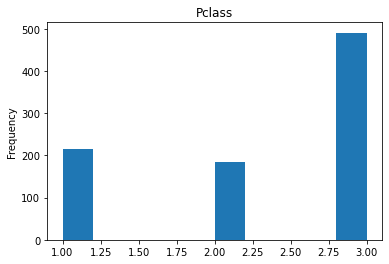

Pclass: 
 1    216
2    184
3    491
Name: Pclass, dtype: int64


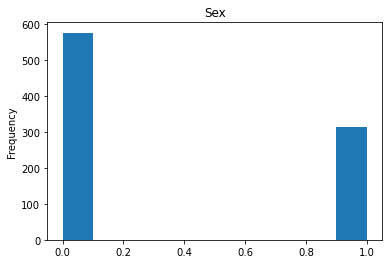

Sex: 
 0    577
1    314
Name: Sex, dtype: int64


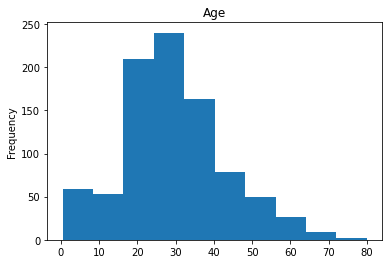

Age: 
 0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 164, dtype: int64


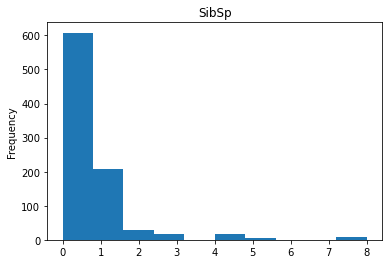

SibSp: 
 0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


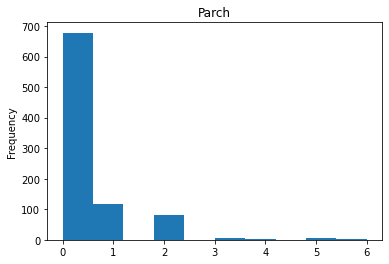

Parch: 
 0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


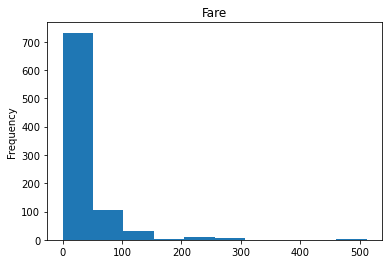

Fare: 
 0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64


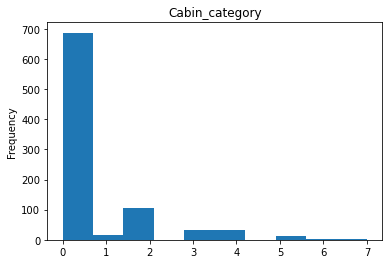

Cabin_category: 
 0.0    687
1.0     15
2.0    106
3.0     33
4.0     32
5.0     13
6.0      4
7.0      1
Name: Cabin_category, dtype: int64


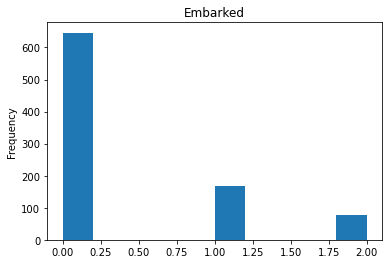

Embarked: 
 0    646
1    168
2     77
Name: Embarked, dtype: int64


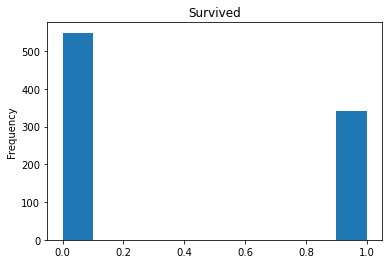

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


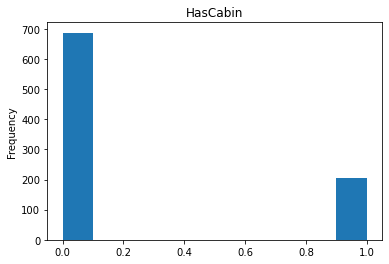

HasCabin: 
 0    687
1    204
Name: HasCabin, dtype: int64


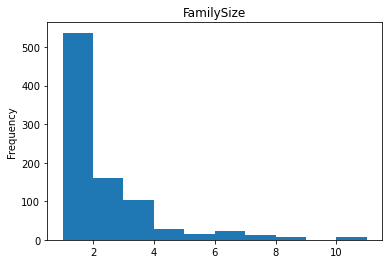

FamilySize: 
 1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: FamilySize, dtype: int64


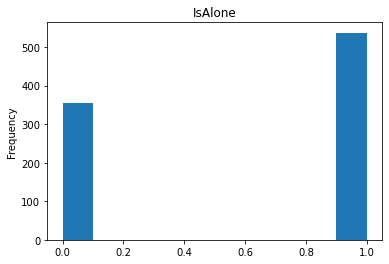

IsAlone: 
 0    354
1    537
Name: IsAlone, dtype: int64


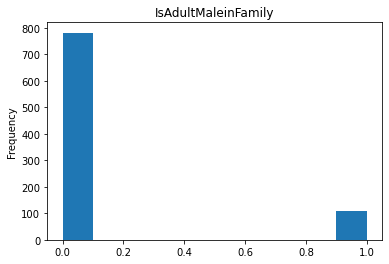

IsAdultMaleinFamily: 
 0    781
1    110
Name: IsAdultMaleinFamily, dtype: int64


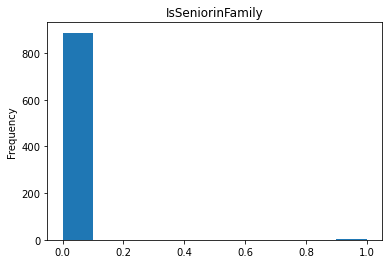

IsSeniorinFamily: 
 0    887
1      4
Name: IsSeniorinFamily, dtype: int64


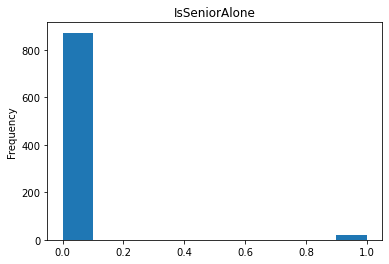

IsSeniorAlone: 
 0    872
1     19
Name: IsSeniorAlone, dtype: int64


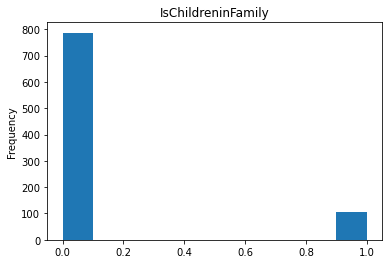

IsChildreninFamily: 
 0    787
1    104
Name: IsChildreninFamily, dtype: int64


In [11]:
data_EDA=EDA(train)
uni_var=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin_category','Embarked','Survived','HasCabin','FamilySize','IsAlone','IsAdultMaleinFamily','IsSeniorinFamily','IsSeniorAlone','IsChildreninFamily']
data_EDA.uni_plot(uni_var)

In [12]:
test.dtypes

PassengerId              int64
Pclass                   int64
Name                    object
Sex                      int64
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                 int64
Age_bucket               int64
Cabin_category         float64
HasCabin                 int64
Name_length              int64
HasParch                 int64
HasSibSp                 int64
FamilySize               int64
IsAlone                  int64
Title                    int64
LastName                object
IsAdultMaleinFamily      int64
IsChildreninFamily       int64
IsSeniorinFamily         int64
IsSeniorAlone            int64
Ticket_type               int8
dtype: object

### 2.4 Bivariate Analysis
<font color=white size=4 face=Calibri> Bivariate analysis is another simplest way to analyze the data. It gives a sense of what the empirical relationship between two variables. Here we are analyzing the relationships between the target variable and each of the explanatory variables. </font>

</br>
</br>
<font color=white size=4 face=Calibri> This bivariate analysis helps us to select the variables. As we can see that Sex, Cabin_category, Name_length, IsAlone, IsAdultMaleinFamily    </font>

<Figure size 1000x1000 with 0 Axes>

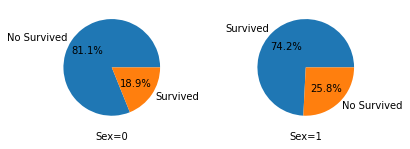

<Figure size 1000x1000 with 0 Axes>

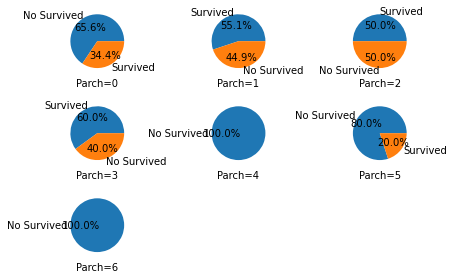

<Figure size 1000x1000 with 0 Axes>

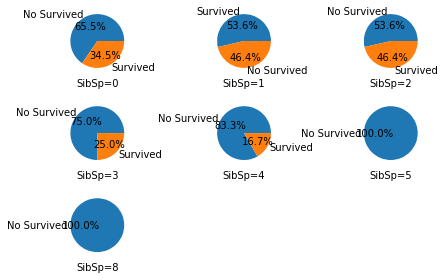

<Figure size 1000x1000 with 0 Axes>

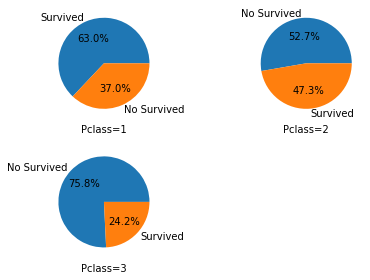

<Figure size 1000x1000 with 0 Axes>

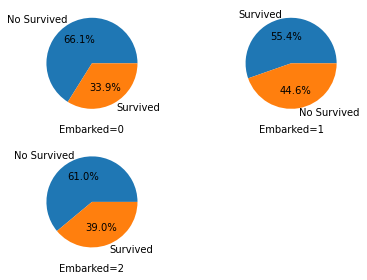

<Figure size 1000x1000 with 0 Axes>

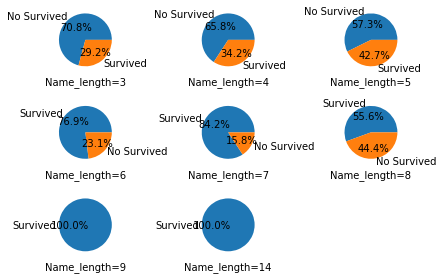

<Figure size 1000x1000 with 0 Axes>

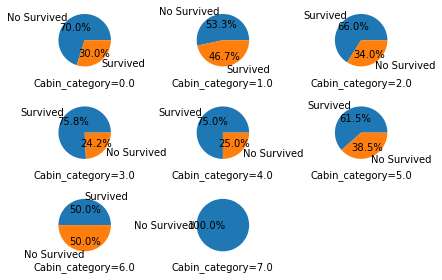

<Figure size 1000x1000 with 0 Axes>

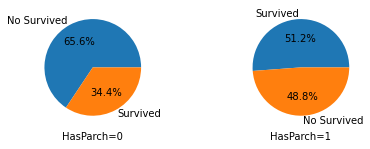

<Figure size 1000x1000 with 0 Axes>

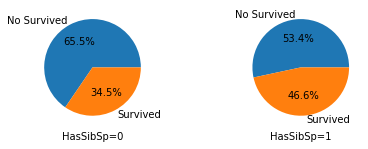

<Figure size 1000x1000 with 0 Axes>

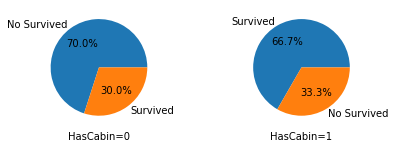

<Figure size 1000x1000 with 0 Axes>

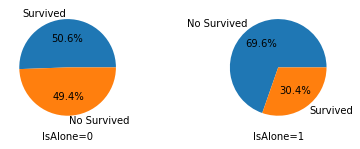

<Figure size 1000x1000 with 0 Axes>

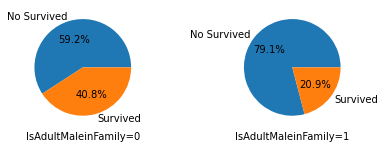

<Figure size 1000x1000 with 0 Axes>

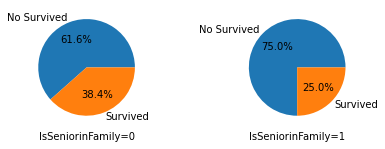

<Figure size 1000x1000 with 0 Axes>

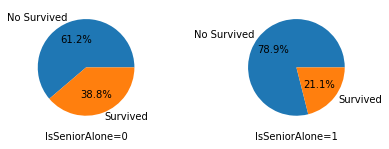

<Figure size 1000x1000 with 0 Axes>

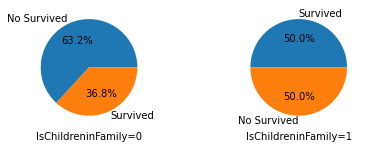

In [13]:
bi_var=['Sex','Parch','SibSp','Pclass','Embarked','Name_length','Cabin_category','HasParch','HasSibSp','HasCabin','IsAlone','IsAdultMaleinFamily','IsSeniorinFamily','IsSeniorAlone','IsChildreninFamily']
data_EDA.bi_pie_plot(bi_var,'Survived')

In [14]:
train['IsAdultMaleinFamily'].value_counts()

0    781
1    110
Name: IsAdultMaleinFamily, dtype: int64

### 2.3 Correlation Analysis
<font color=white size=4 face=Calibri> Univariate analysis is another simplest way to analyze the data. It gives a sense of what the empirical relationship between two variables. Here we are analyzing the relationships between the target variable and each of the explanatory variables. </font>

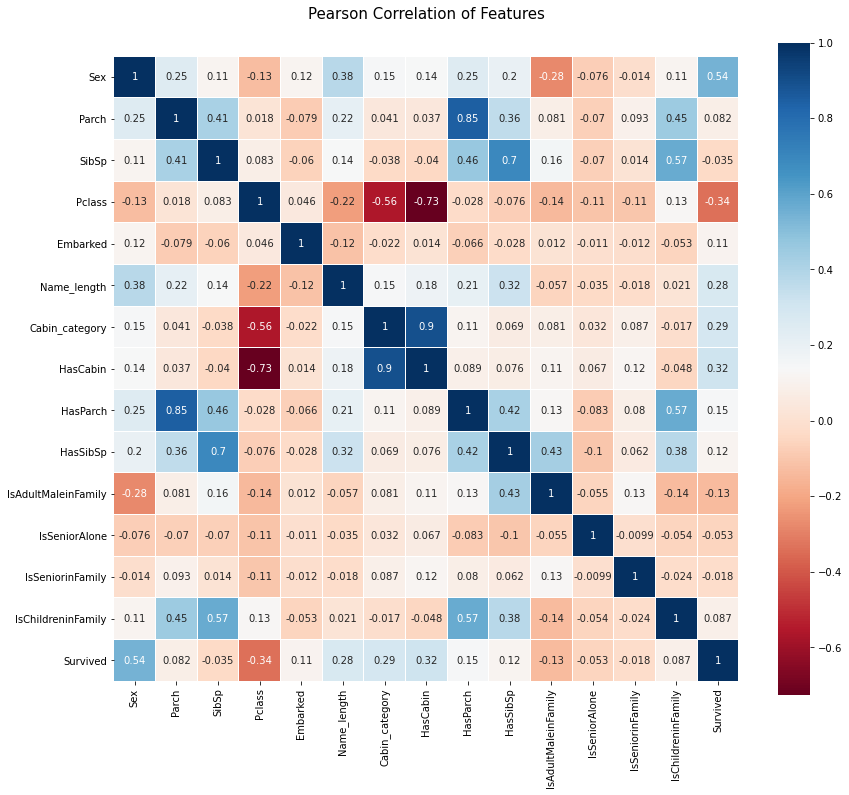

In [15]:
corr_df=train[['Sex','Parch','SibSp','Pclass','Embarked','Name_length','Cabin_category','HasCabin','HasParch','HasSibSp','IsAdultMaleinFamily','IsSeniorAlone','IsSeniorinFamily','IsChildreninFamily','Survived']]
data_EDA.corr_plot(corr_df)

In [16]:
train.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Name                    object
Sex                      int64
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Cabin                   object
Embarked                 int64
Age_bucket               int64
Cabin_category         float64
HasCabin                 int64
Name_length              int64
HasParch                 int64
HasSibSp                 int64
FamilySize               int64
IsAlone                  int64
IsAdultMaleinFamily      int64
IsChildreninFamily       int64
IsSeniorinFamily         int64
IsSeniorAlone            int64
Title                    int64
LastName                object
Ticket_type              int16
dtype: object

## 4 Data Modelling and Validation
<br>
<font color=white size=4 face=Calibri>Here we are doing the missing check to see the missing percentage for each variable using EDA library. As we can see that there 19.87% passengers missing Age information, 77.10% missing Cabin information, and 0.22% missing Embarked information. Hence we are also imputing those missing values since many machine learning algorithms do not support data with missing values. The validation method used in this post is K-fold cross validation. </font>
<br>
<br>

<font color=white size=4 face=Calibri>The features we chose to fit into the models are 'Pclass', 'Sex', 'Age', 'FamilySize','Fare', 'Embarked','Cabin_category','IsAlone','Name_length','IsAdultMaleinFamily','IsChildreninFamily'. </font>
<br>

> #### Machine Learning Algorithm Used
 <ul>
  <li> Logistic Regression  </li>
  <li> Random Forest </li>
  <li> Extra Tree  </li>
  <li> AdaBoost  </li>
  <li> Gradient Boosting  </li>
  <li> Support Vector Classifier  </li>
  <li> XgBoost   </li>
  <li> Light GBM   </li>  
 </ul> 
<br>

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)

import xgboost as xgb
import lightgbm as lgb

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [18]:
def randomGrid_cv(clf,x_train,y_train,x_test,y_test,x_valid,params,param_comb=50,folds=6):
    skf = StratifiedKFold(n_splits=folds,shuffle=True,random_state=0)
    random_search = RandomizedSearchCV(clf,param_distributions=params,n_iter=param_comb,scoring='roc_auc',n_jobs=-1,\
                      cv=skf.split(x_train,y_train),random_state=0)
    random_search.fit(x_train,y_train)
    preds_train = random_search.predict(x_train)
    preds_test = random_search.predict(x_test)
    preds = random_search.predict(x_valid)
    rfc_accuracy = accuracy_score(y_test,preds_test) * 100
    print("Accuracy=",rfc_accuracy)
    return preds_train,preds_test,preds,random_search.best_estimator_

In [19]:
var_lst=['Pclass', 'Sex', 'Age', 'FamilySize','Fare', 'Embarked','Cabin_category','IsAlone','Name_length','IsAdultMaleinFamily','IsChildreninFamily']
target=['Survived']

df_train_x = train[var_lst]
df_train_y = train[target]
x_valid = test[var_lst]
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=1)


In [20]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': [-1],
    'n_estimators': [100*x for x in range(1,10)],
     'warm_start': [True], 
    'max_depth': [x for x in range(1,20)],
    'min_samples_leaf': [x for x in range(1,100)],
    'max_features' : ['sqrt'],
    'verbose': [1]
}

# Extra Trees Parameters
et_params = {
    'n_jobs': [-1],
    'n_estimators':[100*x for x in range(1,7)],
    'max_features': [0.5,0.4,0.3, 0.2,0.1],
    'max_depth': [x for x in range(1,20)],
    'min_samples_leaf': [x for x in range(1,10)],
    'verbose': [1]
}

# AdaBoost parameters
ada_params = {
    'n_estimators': [100*x for x in range(1,7)],
    'learning_rate' : [0.25*x for x in range(1,10)]
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': [100*x for x in range(1,7)],
    'max_features': [0.5,0.4,0.3, 0.2,0.1],
    'learning_rate': [0.025,0.1, 0.05, 0.01],
    'max_depth': [x for x in range(1,20)],
    'min_samples_leaf': [x for x in range(1,10)],
    'verbose': [1]
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : ['linear'],
    'C' : [0.025*x for x in range(1,10)]
    }

# Logistic parameters 
lr_params = {
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty' : ['l1','l2'],
    'C' : [0.01,0.1,0.5,1,10,100]
    }

# KNN parameters
knn_params = {
    'n_jobs': [-1],
    'n_neighbors' : [x for x in range(1,10)],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10*x for x in range(1,10)]
    }

# lightGBM parameters
lgb_params = {
     'n_estimators': [100*x for x in range(1,10)],
     'num_leaves': [10*x for x in range(1,10)],
     'learning_rate': [0.025*x for x in range(1,10)],
    }

# xgboost parameters
xgb_params = {
     'n_estimators': [200*x for x in range(1,10)],
     'max_depth': [x for x in range(1,10)],
     'min_child_weight': [10*x for x in range(1,10)],
     'gamma':[0.9],                        
     'subsample':[0.8],
     'colsample_bytree':[0.8],
     'objective': ['binary:logistic'],
     'nthread': [-1],
     'scale_pos_weight':[1]
    }

In [21]:
# lightGBM 
lgb_pred_train, lgb_pred_test, lgb_pred, lgb_estimator = randomGrid_cv(lgb.LGBMClassifier(),x_train,y_train,x_test,y_test, x_valid, lgb_params)

Accuracy= 86.59217877094973


In [22]:
# random forest
rf_pred_train, rf_pred_test, rf_pred, rf_estimator = randomGrid_cv(RandomForestClassifier(),x_train,y_train,x_test,y_test, x_valid, rf_params)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


Accuracy= 83.24022346368714


[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


In [23]:
# Extra Trees
et_pred_train, et_pred_test, et_pred, et_estimator = randomGrid_cv(ExtraTreesClassifier(),x_train,y_train,x_test,y_test, x_valid,et_params)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


Accuracy= 84.35754189944134


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


In [24]:
# adaboost
ada_pred_train, ada_pred_test, ada_pred, ada_estimator = randomGrid_cv(AdaBoostClassifier(),x_train,y_train,x_test,y_test, x_valid,ada_params)

Accuracy= 82.12290502793296


In [25]:
# gradient boost
gb_pred_train, gb_pred_test, gb_pred, gb_estimator = randomGrid_cv(GradientBoostingClassifier(),x_train,y_train,x_test,y_test, x_valid,gb_params)

      Iter       Train Loss   Remaining Time 
         1           1.3296            0.79s
         2           1.3208            0.79s
         3           1.3114            0.79s
         4           1.3039            0.78s
         5           1.2970            0.86s
         6           1.2889            1.00s
         7           1.2809            0.96s
         8           1.2732            0.96s
         9           1.2658            0.93s
        10           1.2588            0.89s
        20           1.1881            0.76s
        30           1.1289            0.68s
        40           1.0784            0.61s
        50           1.0317            0.57s
        60           0.9906            0.54s
        70           0.9545            0.48s
        80           0.9192            0.44s
        90           0.8890            0.42s
       100           0.8623            0.38s
       200           0.6914            0.00s
Accuracy= 84.91620111731844


In [26]:
# svc
svc_pred_train, svc_pred_test, svc_pred, svc_estimator = randomGrid_cv(svm.SVC(),x_train,y_train,x_test,y_test, x_valid,svc_params)

Accuracy= 76.53631284916202


In [27]:
# logistic regression
lr_pred_train, lr_pred_test, lr_pred, lr_estimator = randomGrid_cv(LogisticRegression(),x_train,y_train,x_test,y_test, x_valid,lr_params)

Accuracy= 81.00558659217877


In [28]:
# knn
knn_pred_train, knn_pred_test,knn_pred, knn_estimator = randomGrid_cv(KNeighborsClassifier(),x_train,y_train,x_test,y_test, x_valid,knn_params)

Accuracy= 72.62569832402235


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


Text(0.5, 1.0, 'Feature Importance in GradientBoost')

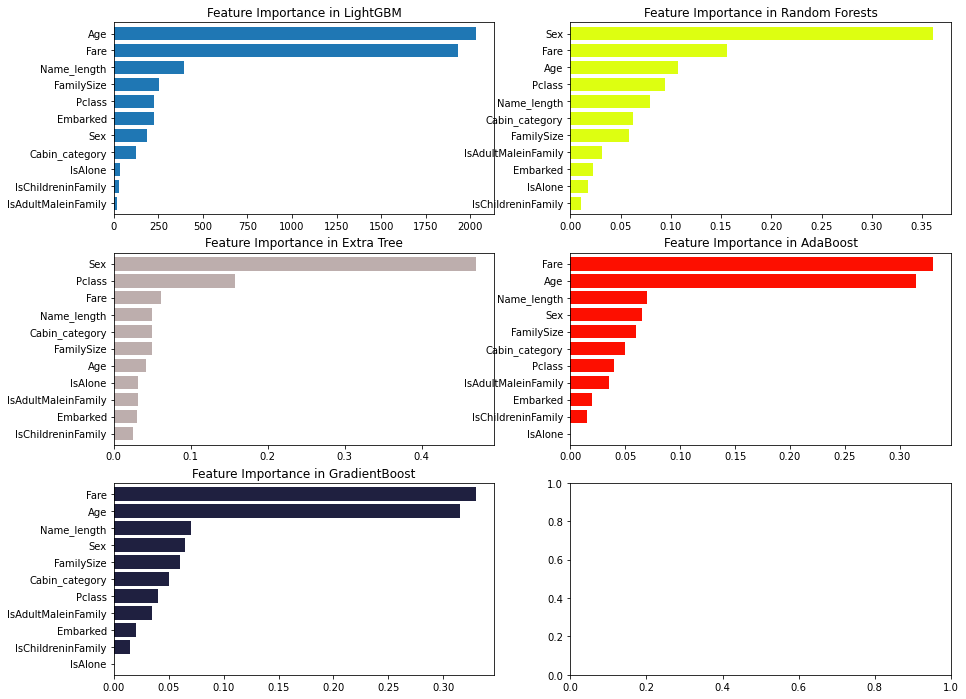

In [30]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(3,2,figsize=(15,12))

lgb_ = lgb_estimator.fit(x_train,y_train)
pd.Series(lgb_.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in LightGBM')

rf = rf_estimator.fit(x_train,y_train)
pd.Series(rf.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in Random Forests')

et = et_estimator.fit(x_train,y_train)
pd.Series(et.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='#bdaead')
ax[1,0].set_title('Feature Importance in Extra Tree')

ada = ada_estimator.fit(x_train,y_train)
pd.Series(ada.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in AdaBoost')

gb = ada_estimator.fit(x_train,y_train)
pd.Series(gb.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2,0],color='#1f2040')
ax[2,0].set_title('Feature Importance in GradientBoost')

## 5 Ensembling
<br>
<font color=white size=4 face=Calibri>Ensembling is a good way to increase the predictive accuracy. It is to combine those weak kernels to create a single powerful model for prediction. Jere the method we chose is the boosting with the Xgboost classifier. </font>
<br>
<br>

> #### Machine Learning Algorithm Used
 <ul>
  <li> Voting Classifier  </li>
  <li> Bagging </li>
  <li> Boosting  </li> 
 </ul> 
 
<br>


In [36]:
from xgboost import XGBClassifier
new_inputs_valid = pd.DataFrame({'rf_pred':rf_pred,'et_pred':et_pred,'ada_pred':ada_pred,\
                           'svc_pred':svc_pred, 'lgb_pred':lgb_pred})

new_inputs_train = pd.DataFrame({'rf_pred':rf_pred_train,'et_pred':et_pred_train,'ada_pred':ada_pred_train,\
                           'svc_pred':svc_pred_train, 'lgb_pred_train':lgb_pred_train})

new_inputs_test = pd.DataFrame({'rf_pred':rf_pred_test,'et_pred':et_pred_test,'ada_pred':ada_pred_test,\
                           'svc_pred':svc_pred_test,'lgb_pred_test':lgb_pred_test})

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(new_inputs_train, y_train)

predictions = gbm.predict(new_inputs_valid)

[22:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
test['pred']=predictions

In [38]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": test['pred']
    })
# submission.to_csv('../output/submission.csv', index=False)

In [39]:
submission.to_csv('submission.csv', index=False)

<img src="rank_position.png">